In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

import tensorflow as tf

from sklearn.datasets import fetch_openml

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, InputLayer

In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

## Data Generator

In [20]:
batch_size=16
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data

train_dataset = image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='images/shape/train',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='images/shape/train',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')


Found 336 images belonging to 3 classes.
Found 84 images belonging to 3 classes.


## Some Model Archictures

In [ ]:
NN = Sequential()

NN.add(InputLayer(input_shape=input_shape=(150, 150, 3)))

NN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())

NN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())

NN.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))
NN.add(GlobalAveragePooling2D())

NN.add(Dense(10, activation='relu'))
NN.add(Dense(3, activation='softmax'))  # 10 target classes

NN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
NN.summary()

In [ ]:
NN.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_split=0.25,
       callbacks=[
           keras.callbacks.ModelCheckpoint(
               'models/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])  # track progress as we fit

In [33]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Fully connected block - flattening followed by dense and output layers
# NN.add(Flatten())
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 target classes



model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_14 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_15 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 64)       

## Fit the model

In [35]:
model.fit(train_dataset, validation_data=validation_dataset, epochs=5, verbose=1,
       callbacks=[
           tf.keras.callbacks.ModelCheckpoint(
               'models/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])  # track progress as we fit


# model.fit(
#         train_dataset,
#         epochs=1,
#         validation_data=validation_dataset,
#         validation_steps=800 // batch_size)
# # model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/5


ValueError: in user code:

    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/engine/training.py:788 train_step
        loss = self.compiled_loss(
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, None) and (None, 17, 17, 3) are incompatible


In [94]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'images/shape/train', image_size=(100, 100), batch_size=32,
    label_mode='categorical'
)


for data, labels in dataset.take(1):
    print(data.shape)
    X_train = data
    print(labels.shape)
    y_train_cat = labels

# X_train[1]

Found 420 files belonging to 3 classes.
(32, 100, 100, 3)
(32, 3)


In [65]:
y_train[1]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 0., 0.], dtype=float32)>

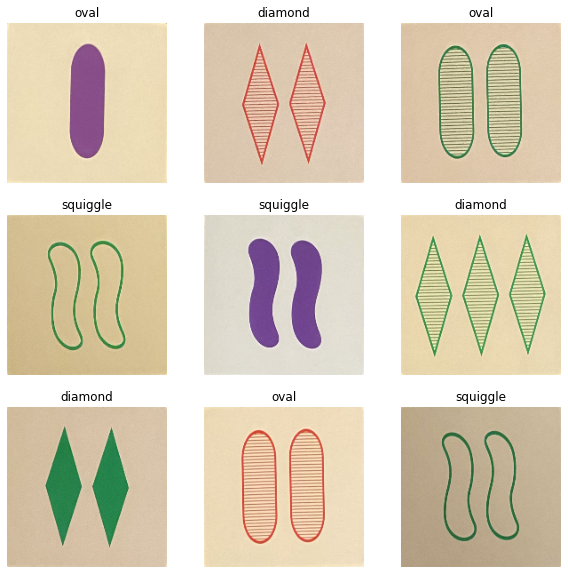

In [55]:
class_names = dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [56]:
dataset

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [89]:
NN_scratch.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                400010    
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 33        
Total params: 400,491
Trainable params: 400,491
Non-trainable params: 0
_________________________________________________________________


In [88]:
NN_scratch = Sequential(
                        [InputLayer(input_shape=X_train.shape[1:]),
                         Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
#                          Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
#                          MaxPooling2D(),
                         Flatten(),
                         Dense(10, activation='relu'),
                         Dense(3, activation='softmax')]
                       )

NN_scratch.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

NN_scratch.fit(X_train, y_train_cat, epochs=1000, verbose=1, validation_split=0.25)


Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 11.1213 - accuracy: 0.4167 - val_loss: 1588.6608 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 53ms/step - loss: 1296.2139 - accuracy: 0.3333 - val_loss: 641.1472 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 77ms/step - loss: 612.1645 - accuracy: 0.3333 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 57ms/step - loss: 78.9215 - accuracy: 0.2500 - val_loss: 1.0964 - val_accuracy: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 73ms/step - loss: 1.0989 - accuracy: 0.2500 - val_loss: 1.0966 - val_accuracy: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 82ms/step - loss: 1.0988 - accuracy: 0.2500 - val_loss: 1.0967 - val_accuracy: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 60ms/step - loss: 1.0988 - accuracy: 0.2500 - val_loss: 1.0969 - val_accuracy

1/1 [==============================] - 0s 56ms/step - loss: 1.0952 - accuracy: 0.4167 - val_loss: 1.1194 - val_accuracy: 0.0000e+00
Epoch 58/1000
1/1 [==============================] - 0s 68ms/step - loss: 1.0951 - accuracy: 0.4167 - val_loss: 1.1200 - val_accuracy: 0.0000e+00
Epoch 59/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.0950 - accuracy: 0.4167 - val_loss: 1.1205 - val_accuracy: 0.0000e+00
Epoch 60/1000
1/1 [==============================] - 0s 62ms/step - loss: 1.0949 - accuracy: 0.4167 - val_loss: 1.1211 - val_accuracy: 0.0000e+00
Epoch 61/1000
1/1 [==============================] - 0s 63ms/step - loss: 1.0948 - accuracy: 0.4167 - val_loss: 1.1217 - val_accuracy: 0.0000e+00
Epoch 62/1000
1/1 [==============================] - 0s 58ms/step - loss: 1.0948 - accuracy: 0.4167 - val_loss: 1.1223 - val_accuracy: 0.0000e+00
Epoch 63/1000
1/1 [==============================] - 0s 69ms/step - loss: 1.0947 - accuracy: 0.4167 - val_loss: 1.1228 - val_accuracy: 0.0

KeyboardInterrupt: 

In [95]:
NN = Sequential()

NN.add(InputLayer(input_shape=X_train.shape[1:]))

# Conv block 1.  You can add more conv steps to
# each block to increase model capacity.
NN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
# NN.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())

# Conv block 2 - note we increase filter dimension as we move
# further into the network. You can add more conv steps to
# each block to increase model capacity.
NN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
# NN.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())

NN.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))

NN.add(GlobalAveragePooling2D())

# Fully connected block - flattening followed by dense and output layers
# NN.add(Flatten())
NN.add(Dense(20, activation='relu'))
NN.add(Dense(3, activation='softmax'))  # 10 target classes

NN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
NN.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 100, 100, 10)      280       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 50, 50, 10)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 50, 50, 20)        1820      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 25, 25, 20)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 25, 25, 30)        5430      
_________________________________________________________________
global_average_pooling2d_7 ( (None, 30)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 20)              

In [96]:
NN.fit(X_train, y_train_cat, epochs=500, verbose=1, validation_split=0.25,
       callbacks=[
           tf.keras.callbacks.ModelCheckpoint(
               'models/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])  # track progress as we fit

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 21.2052 - accuracy: 0.2500 - val_loss: 16.8936 - val_accuracy: 0.2500
Epoch 2/500
1/1 [==============================] - 0s 118ms/step - loss: 13.2387 - accuracy: 0.4583 - val_loss: 12.4525 - val_accuracy: 0.2500
Epoch 3/500
1/1 [==============================] - 0s 125ms/step - loss: 13.0326 - accuracy: 0.4583 - val_loss: 4.4225 - val_accuracy: 0.6250
Epoch 4/500
1/1 [==============================] - 0s 143ms/step - loss: 9.5150 - accuracy: 0.2917 - val_loss: 4.8553 - val_accuracy: 0.6250
Epoch 5/500
1/1 [==============================] - 0s 193ms/step - loss: 10.3691 - accuracy: 0.2917 - val_loss: 2.9309 - val_accuracy: 0.6250
Epoch 6/500
1/1 [==============================] - 0s 128ms/step - loss: 6.2605 - accuracy: 0.2917 - val_loss: 4.0371 - val_accuracy: 0.2500
Epoch 7/500
1/1 [==============================] - 0s 135ms/step - loss: 3.8966 - accuracy: 0.4583 - val_loss: 4.3561 - val_accuracy: 0.2500
Epoch 8/50

Epoch 59/500
1/1 [==============================] - 0s 123ms/step - loss: 1.1483 - accuracy: 0.4583 - val_loss: 1.3260 - val_accuracy: 0.2500
Epoch 60/500
1/1 [==============================] - 0s 129ms/step - loss: 1.0131 - accuracy: 0.4583 - val_loss: 1.2560 - val_accuracy: 0.1250
Epoch 61/500
1/1 [==============================] - 0s 117ms/step - loss: 1.0820 - accuracy: 0.5000 - val_loss: 1.4745 - val_accuracy: 0.2500
Epoch 62/500
1/1 [==============================] - 0s 115ms/step - loss: 0.9944 - accuracy: 0.5833 - val_loss: 1.5844 - val_accuracy: 0.2500
Epoch 63/500
1/1 [==============================] - 0s 135ms/step - loss: 1.0282 - accuracy: 0.5000 - val_loss: 1.1994 - val_accuracy: 0.1250
Epoch 64/500
1/1 [==============================] - 0s 122ms/step - loss: 0.9996 - accuracy: 0.5000 - val_loss: 1.1882 - val_accuracy: 0.1250
Epoch 65/500
1/1 [==============================] - 0s 142ms/step - loss: 0.9735 - accuracy: 0.5833 - val_loss: 1.4696 - val_accuracy: 0.2500
Epoch 

1/1 [==============================] - 0s 152ms/step - loss: 0.5994 - accuracy: 0.7500 - val_loss: 2.4393 - val_accuracy: 0.1250
Epoch 117/500
1/1 [==============================] - 0s 135ms/step - loss: 0.6087 - accuracy: 0.7500 - val_loss: 2.0546 - val_accuracy: 0.2500
Epoch 118/500
1/1 [==============================] - 0s 129ms/step - loss: 0.6529 - accuracy: 0.7500 - val_loss: 2.6635 - val_accuracy: 0.1250
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 0.6336 - accuracy: 0.62 - 0s 196ms/step - loss: 0.6336 - accuracy: 0.6250 - val_loss: 2.3160 - val_accuracy: 0.2500
Epoch 120/500
1/1 [==============================] - 0s 220ms/step - loss: 0.5812 - accuracy: 0.7917 - val_loss: 2.1060 - val_accuracy: 0.3750
Epoch 121/500
1/1 [==============================] - 0s 203ms/step - loss: 0.6157 - accuracy: 0.7500 - val_loss: 2.5296 - val_accuracy: 0.1250
Epoch 122/500
1/1 [==============================] - 0s 180ms/step - loss: 0.5957 - accuracy: 0.7917 - val_loss: 2

1/1 [==============================] - 0s 133ms/step - loss: 0.3771 - accuracy: 0.9167 - val_loss: 3.7079 - val_accuracy: 0.1250
Epoch 174/500
1/1 [==============================] - 0s 131ms/step - loss: 0.3737 - accuracy: 0.9583 - val_loss: 3.6564 - val_accuracy: 0.1250
Epoch 175/500
1/1 [==============================] - 0s 137ms/step - loss: 0.3717 - accuracy: 0.9583 - val_loss: 3.7775 - val_accuracy: 0.1250
Epoch 176/500
1/1 [==============================] - 0s 134ms/step - loss: 0.3694 - accuracy: 0.8750 - val_loss: 3.8078 - val_accuracy: 0.1250
Epoch 177/500
1/1 [==============================] - 0s 125ms/step - loss: 0.3638 - accuracy: 0.9583 - val_loss: 3.9266 - val_accuracy: 0.1250
Epoch 178/500
1/1 [==============================] - 0s 129ms/step - loss: 0.3618 - accuracy: 0.9583 - val_loss: 3.9978 - val_accuracy: 0.1250
Epoch 179/500
1/1 [==============================] - 0s 136ms/step - loss: 0.3641 - accuracy: 0.9167 - val_loss: 3.9112 - val_accuracy: 0.1250
Epoch 180/500

1/1 [==============================] - 0s 126ms/step - loss: 0.5510 - accuracy: 0.7500 - val_loss: 3.0424 - val_accuracy: 0.2500
Epoch 231/500
1/1 [==============================] - 0s 118ms/step - loss: 0.3788 - accuracy: 0.8750 - val_loss: 3.0207 - val_accuracy: 0.1250
Epoch 232/500
1/1 [==============================] - 0s 123ms/step - loss: 0.5522 - accuracy: 0.7917 - val_loss: 3.4944 - val_accuracy: 0.2500
Epoch 233/500
1/1 [==============================] - 0s 131ms/step - loss: 0.3536 - accuracy: 0.8750 - val_loss: 4.3439 - val_accuracy: 0.1250
Epoch 234/500
1/1 [==============================] - 0s 105ms/step - loss: 0.5084 - accuracy: 0.7917 - val_loss: 3.6562 - val_accuracy: 0.2500
Epoch 235/500
1/1 [==============================] - 0s 114ms/step - loss: 0.3255 - accuracy: 0.9167 - val_loss: 3.3345 - val_accuracy: 0.1250
Epoch 236/500
1/1 [==============================] - 0s 151ms/step - loss: 0.4446 - accuracy: 0.8333 - val_loss: 3.7042 - val_accuracy: 0.2500
Epoch 237/500

1/1 [==============================] - 0s 137ms/step - loss: 0.2013 - accuracy: 0.9583 - val_loss: 5.7978 - val_accuracy: 0.2500
Epoch 288/500
1/1 [==============================] - 0s 134ms/step - loss: 0.2004 - accuracy: 0.9583 - val_loss: 5.8164 - val_accuracy: 0.2500
Epoch 289/500
1/1 [==============================] - 0s 196ms/step - loss: 0.1995 - accuracy: 0.9583 - val_loss: 5.8528 - val_accuracy: 0.2500
Epoch 290/500
1/1 [==============================] - 0s 146ms/step - loss: 0.1979 - accuracy: 0.9583 - val_loss: 5.8952 - val_accuracy: 0.2500
Epoch 291/500
1/1 [==============================] - 0s 149ms/step - loss: 0.1965 - accuracy: 0.9583 - val_loss: 5.9260 - val_accuracy: 0.2500
Epoch 292/500
1/1 [==============================] - 0s 134ms/step - loss: 0.1954 - accuracy: 0.9583 - val_loss: 5.9742 - val_accuracy: 0.2500
Epoch 293/500
1/1 [==============================] - 0s 136ms/step - loss: 0.1943 - accuracy: 0.9583 - val_loss: 6.0233 - val_accuracy: 0.2500
Epoch 294/500

1/1 [==============================] - 0s 146ms/step - loss: 0.1393 - accuracy: 0.9583 - val_loss: 7.4682 - val_accuracy: 0.2500
Epoch 345/500
1/1 [==============================] - 0s 132ms/step - loss: 0.1373 - accuracy: 0.9583 - val_loss: 7.4617 - val_accuracy: 0.2500
Epoch 346/500
1/1 [==============================] - 0s 140ms/step - loss: 0.1359 - accuracy: 0.9583 - val_loss: 7.5343 - val_accuracy: 0.2500
Epoch 347/500
1/1 [==============================] - 0s 130ms/step - loss: 0.1354 - accuracy: 0.9583 - val_loss: 7.5220 - val_accuracy: 0.2500
Epoch 348/500
1/1 [==============================] - 0s 141ms/step - loss: 0.1341 - accuracy: 0.9583 - val_loss: 7.5325 - val_accuracy: 0.2500
Epoch 349/500
1/1 [==============================] - 0s 137ms/step - loss: 0.1336 - accuracy: 0.9583 - val_loss: 7.5503 - val_accuracy: 0.2500
Epoch 350/500
1/1 [==============================] - 0s 151ms/step - loss: 0.1323 - accuracy: 0.9583 - val_loss: 7.5654 - val_accuracy: 0.2500
Epoch 351/500

1/1 [==============================] - 0s 121ms/step - loss: 0.0960 - accuracy: 1.0000 - val_loss: 8.4414 - val_accuracy: 0.2500
Epoch 402/500
1/1 [==============================] - 0s 123ms/step - loss: 0.0956 - accuracy: 0.9583 - val_loss: 8.4919 - val_accuracy: 0.2500
Epoch 403/500
1/1 [==============================] - 0s 127ms/step - loss: 0.0947 - accuracy: 1.0000 - val_loss: 8.5303 - val_accuracy: 0.2500
Epoch 404/500
1/1 [==============================] - 0s 126ms/step - loss: 0.0947 - accuracy: 1.0000 - val_loss: 8.5962 - val_accuracy: 0.2500
Epoch 405/500
1/1 [==============================] - 0s 125ms/step - loss: 0.0935 - accuracy: 1.0000 - val_loss: 8.5974 - val_accuracy: 0.2500
Epoch 406/500
1/1 [==============================] - 0s 114ms/step - loss: 0.0931 - accuracy: 1.0000 - val_loss: 8.5582 - val_accuracy: 0.2500
Epoch 407/500
1/1 [==============================] - 0s 170ms/step - loss: 0.0929 - accuracy: 1.0000 - val_loss: 8.5933 - val_accuracy: 0.2500
Epoch 408/500

1/1 [==============================] - 0s 124ms/step - loss: 0.0661 - accuracy: 1.0000 - val_loss: 9.2878 - val_accuracy: 0.2500
Epoch 459/500
1/1 [==============================] - 0s 123ms/step - loss: 0.0654 - accuracy: 1.0000 - val_loss: 9.3832 - val_accuracy: 0.2500
Epoch 460/500
1/1 [==============================] - 0s 312ms/step - loss: 0.0653 - accuracy: 1.0000 - val_loss: 9.3467 - val_accuracy: 0.2500
Epoch 461/500
1/1 [==============================] - 0s 129ms/step - loss: 0.0646 - accuracy: 1.0000 - val_loss: 9.3989 - val_accuracy: 0.2500
Epoch 462/500
1/1 [==============================] - 0s 124ms/step - loss: 0.0638 - accuracy: 1.0000 - val_loss: 9.4409 - val_accuracy: 0.2500
Epoch 463/500
1/1 [==============================] - 0s 133ms/step - loss: 0.0635 - accuracy: 1.0000 - val_loss: 9.3743 - val_accuracy: 0.2500
Epoch 464/500
1/1 [==============================] - 0s 130ms/step - loss: 0.0629 - accuracy: 1.0000 - val_loss: 9.3946 - val_accuracy: 0.2500
Epoch 465/500

In [86]:
NN = Sequential()

NN.add(InputLayer(input_shape=X_train.shape[1:]))

# Conv block 1.  You can add more conv steps to
# each block to increase model capacity.
NN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
NN.add(GlobalAveragePooling2D())

# Fully connected block - flattening followed by dense and output layers
# NN.add(Flatten())
# NN.add(Dense(20, activation='relu'))
NN.add(Dense(3, activation='softmax'))  # 10 target classes

NN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
# NN.summary()
NN.fit(X_train, y_train_cat, epochs=500, verbose=1, validation_split=0.25,
       callbacks=[
           tf.keras.callbacks.ModelCheckpoint(
               'models/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])  # track progress as we fit

Epoch 1/500
1/1 [==============================] - 0s 436ms/step - loss: 110.8982 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/500
1/1 [==============================] - 0s 30ms/step - loss: 94.3072 - accuracy: 0.2500 - val_loss: 0.1240 - val_accuracy: 1.0000
Epoch 3/500
1/1 [==============================] - 0s 34ms/step - loss: 77.3318 - accuracy: 0.2500 - val_loss: 5.8772 - val_accuracy: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 35ms/step - loss: 59.9551 - accuracy: 0.2500 - val_loss: 11.9490 - val_accuracy: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 32ms/step - loss: 44.2528 - accuracy: 0.3333 - val_loss: 26.0457 - val_accuracy: 0.2500
Epoch 6/500
1/1 [==============================] - 0s 32ms/step - loss: 40.1128 - accuracy: 0.3333 - val_loss: 41.4586 - val_accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 34ms/step - loss: 42.0052 - accuracy: 0.3333 - val_loss: 49.3512 - val_accuracy: 0.0000

1/1 [==============================] - 0s 33ms/step - loss: 3.9192 - accuracy: 0.4167 - val_loss: 14.8156 - val_accuracy: 0.5000
Epoch 59/500
1/1 [==============================] - 0s 33ms/step - loss: 3.9452 - accuracy: 0.4167 - val_loss: 14.3609 - val_accuracy: 0.5000
Epoch 60/500
1/1 [==============================] - 0s 33ms/step - loss: 4.0415 - accuracy: 0.3333 - val_loss: 14.3075 - val_accuracy: 0.5000
Epoch 61/500
1/1 [==============================] - 0s 32ms/step - loss: 4.0500 - accuracy: 0.2500 - val_loss: 14.6421 - val_accuracy: 0.5000
Epoch 62/500
1/1 [==============================] - 0s 31ms/step - loss: 3.9518 - accuracy: 0.4167 - val_loss: 15.1467 - val_accuracy: 0.5000
Epoch 63/500
1/1 [==============================] - 0s 30ms/step - loss: 3.8762 - accuracy: 0.4167 - val_loss: 15.4876 - val_accuracy: 0.5000
Epoch 64/500
1/1 [==============================] - 0s 32ms/step - loss: 3.8497 - accuracy: 0.4167 - val_loss: 15.4499 - val_accuracy: 0.2500
Epoch 65/500
1/1 [=

Epoch 116/500
1/1 [==============================] - 0s 32ms/step - loss: 3.1271 - accuracy: 0.5000 - val_loss: 14.6308 - val_accuracy: 0.2500
Epoch 117/500
1/1 [==============================] - 0s 35ms/step - loss: 3.1161 - accuracy: 0.5000 - val_loss: 14.6642 - val_accuracy: 0.2500
Epoch 118/500
1/1 [==============================] - 0s 35ms/step - loss: 3.1054 - accuracy: 0.5000 - val_loss: 14.6768 - val_accuracy: 0.2500
Epoch 119/500
1/1 [==============================] - 0s 32ms/step - loss: 3.0943 - accuracy: 0.5000 - val_loss: 14.6537 - val_accuracy: 0.2500
Epoch 120/500
1/1 [==============================] - 0s 31ms/step - loss: 3.0828 - accuracy: 0.5000 - val_loss: 14.6169 - val_accuracy: 0.2500
Epoch 121/500
1/1 [==============================] - 0s 32ms/step - loss: 3.0718 - accuracy: 0.5000 - val_loss: 14.5991 - val_accuracy: 0.2500
Epoch 122/500
1/1 [==============================] - 0s 32ms/step - loss: 3.0613 - accuracy: 0.5000 - val_loss: 14.6122 - val_accuracy: 0.2500

1/1 [==============================] - 0s 54ms/step - loss: 2.6041 - accuracy: 0.5000 - val_loss: 13.8197 - val_accuracy: 0.2500
Epoch 174/500
1/1 [==============================] - 0s 34ms/step - loss: 2.5968 - accuracy: 0.5000 - val_loss: 13.8000 - val_accuracy: 0.2500
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 2.5897 - accuracy: 0.50 - 0s 35ms/step - loss: 2.5897 - accuracy: 0.5000 - val_loss: 13.7770 - val_accuracy: 0.2500
Epoch 176/500
1/1 [==============================] - 0s 92ms/step - loss: 2.5824 - accuracy: 0.5000 - val_loss: 13.7529 - val_accuracy: 0.2500
Epoch 177/500
1/1 [==============================] - 0s 97ms/step - loss: 2.5753 - accuracy: 0.5000 - val_loss: 13.7310 - val_accuracy: 0.2500
Epoch 178/500
1/1 [==============================] - 0s 44ms/step - loss: 2.5682 - accuracy: 0.5000 - val_loss: 13.7107 - val_accuracy: 0.2500
Epoch 179/500
1/1 [==============================] - 0s 48ms/step - loss: 2.5611 - accuracy: 0.5000 - val_loss: 13

1/1 [==============================] - 0s 30ms/step - loss: 2.2408 - accuracy: 0.3333 - val_loss: 12.2892 - val_accuracy: 0.2500
Epoch 231/500
1/1 [==============================] - 0s 33ms/step - loss: 2.2351 - accuracy: 0.3333 - val_loss: 12.2592 - val_accuracy: 0.2500
Epoch 232/500
1/1 [==============================] - 0s 32ms/step - loss: 2.2293 - accuracy: 0.3333 - val_loss: 12.2286 - val_accuracy: 0.2500
Epoch 233/500
1/1 [==============================] - 0s 33ms/step - loss: 2.2235 - accuracy: 0.3333 - val_loss: 12.1973 - val_accuracy: 0.2500
Epoch 234/500
1/1 [==============================] - 0s 31ms/step - loss: 2.2177 - accuracy: 0.3333 - val_loss: 12.1674 - val_accuracy: 0.2500
Epoch 235/500
1/1 [==============================] - 0s 32ms/step - loss: 2.2119 - accuracy: 0.3333 - val_loss: 12.1380 - val_accuracy: 0.2500
Epoch 236/500
1/1 [==============================] - 0s 32ms/step - loss: 2.2061 - accuracy: 0.3333 - val_loss: 12.1076 - val_accuracy: 0.2500
Epoch 237/500

1/1 [==============================] - 0s 31ms/step - loss: 1.9197 - accuracy: 0.3333 - val_loss: 10.5878 - val_accuracy: 0.2500
Epoch 288/500
1/1 [==============================] - 0s 33ms/step - loss: 1.9142 - accuracy: 0.3333 - val_loss: 10.5594 - val_accuracy: 0.2500
Epoch 289/500
1/1 [==============================] - 0s 93ms/step - loss: 1.9089 - accuracy: 0.3333 - val_loss: 10.5311 - val_accuracy: 0.2500
Epoch 290/500
1/1 [==============================] - 0s 118ms/step - loss: 1.9034 - accuracy: 0.3333 - val_loss: 10.5019 - val_accuracy: 0.2500
Epoch 291/500
1/1 [==============================] - 0s 41ms/step - loss: 1.8979 - accuracy: 0.3333 - val_loss: 10.4729 - val_accuracy: 0.2500
Epoch 292/500
1/1 [==============================] - 0s 38ms/step - loss: 1.8924 - accuracy: 0.3333 - val_loss: 10.4450 - val_accuracy: 0.2500
Epoch 293/500
1/1 [==============================] - 0s 39ms/step - loss: 1.8869 - accuracy: 0.3333 - val_loss: 10.4167 - val_accuracy: 0.2500
Epoch 294/50

1/1 [==============================] - 0s 34ms/step - loss: 1.6266 - accuracy: 0.4167 - val_loss: 9.0312 - val_accuracy: 0.2500
Epoch 345/500
1/1 [==============================] - 0s 34ms/step - loss: 1.6221 - accuracy: 0.4167 - val_loss: 9.0038 - val_accuracy: 0.2500
Epoch 346/500
1/1 [==============================] - 0s 33ms/step - loss: 1.6176 - accuracy: 0.4167 - val_loss: 8.9780 - val_accuracy: 0.2500
Epoch 347/500
1/1 [==============================] - 0s 37ms/step - loss: 1.6130 - accuracy: 0.4167 - val_loss: 8.9528 - val_accuracy: 0.2500
Epoch 348/500
1/1 [==============================] - 0s 32ms/step - loss: 1.6086 - accuracy: 0.4167 - val_loss: 8.9261 - val_accuracy: 0.2500
Epoch 349/500
1/1 [==============================] - 0s 33ms/step - loss: 1.6042 - accuracy: 0.4167 - val_loss: 8.9000 - val_accuracy: 0.2500
Epoch 350/500
1/1 [==============================] - 0s 34ms/step - loss: 1.6000 - accuracy: 0.4167 - val_loss: 8.8747 - val_accuracy: 0.2500
Epoch 351/500
1/1 [=

Epoch 402/500
1/1 [==============================] - 0s 35ms/step - loss: 1.4239 - accuracy: 0.3333 - val_loss: 7.6187 - val_accuracy: 0.2500
Epoch 403/500
1/1 [==============================] - 0s 33ms/step - loss: 1.4213 - accuracy: 0.3333 - val_loss: 7.5974 - val_accuracy: 0.2500
Epoch 404/500
1/1 [==============================] - 0s 36ms/step - loss: 1.4187 - accuracy: 0.3333 - val_loss: 7.5760 - val_accuracy: 0.2500
Epoch 405/500
1/1 [==============================] - 0s 33ms/step - loss: 1.4161 - accuracy: 0.3333 - val_loss: 7.5558 - val_accuracy: 0.2500
Epoch 406/500
1/1 [==============================] - 0s 33ms/step - loss: 1.4136 - accuracy: 0.3333 - val_loss: 7.5340 - val_accuracy: 0.2500
Epoch 407/500
1/1 [==============================] - 0s 32ms/step - loss: 1.4111 - accuracy: 0.2500 - val_loss: 7.5142 - val_accuracy: 0.2500
Epoch 408/500
1/1 [==============================] - 0s 32ms/step - loss: 1.4086 - accuracy: 0.2500 - val_loss: 7.4940 - val_accuracy: 0.2500
Epoch 

Epoch 459/500
1/1 [==============================] - 0s 37ms/step - loss: 1.2930 - accuracy: 0.4167 - val_loss: 6.6051 - val_accuracy: 0.0000e+00
Epoch 460/500
1/1 [==============================] - 0s 36ms/step - loss: 1.2909 - accuracy: 0.4167 - val_loss: 6.5904 - val_accuracy: 0.0000e+00
Epoch 461/500
1/1 [==============================] - 0s 39ms/step - loss: 1.2888 - accuracy: 0.4167 - val_loss: 6.5756 - val_accuracy: 0.0000e+00
Epoch 462/500
1/1 [==============================] - 0s 41ms/step - loss: 1.2868 - accuracy: 0.4167 - val_loss: 6.5601 - val_accuracy: 0.0000e+00
Epoch 463/500
1/1 [==============================] - 0s 43ms/step - loss: 1.2848 - accuracy: 0.4167 - val_loss: 6.5462 - val_accuracy: 0.0000e+00
Epoch 464/500
1/1 [==============================] - 0s 35ms/step - loss: 1.2827 - accuracy: 0.4167 - val_loss: 6.5304 - val_accuracy: 0.0000e+00
Epoch 465/500
1/1 [==============================] - 0s 46ms/step - loss: 1.2807 - accuracy: 0.4167 - val_loss: 6.5163 - val

In [ ]:
from  

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(train_X.shape[1], train_X.shape[2], train_X.shape[3])),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(52, activation='softmax')
])

## MNIST Example - Flatten

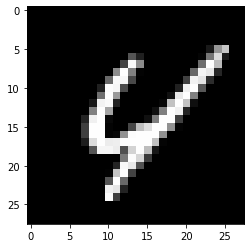

In [104]:
# mnist = fetch_openml('mnist_784')

X_digits, Y_digits = mnist.data.values, mnist.target.astype(np.int64)
X_digits = X_digits.reshape((-1,28,28,1)) #28x28 images with only 1 color channel

X_train, X_test, y_train, y_test = (train_test_split(X_digits, Y_digits, 
                                                     test_size = .2, random_state = 42))

y_train_cat = to_categorical(y_train)
plt.imshow(X_train[1], cmap='gray')

In [106]:
print(X_train[1].shape)
print(y_train.shape)
print(y_train_cat.shape)
X_train[1]

(28, 28, 1)
(56000,)
(56000, 10)


array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

## Simple NN Model - Take 2

Found 1680 files belonging to 3 classes.
Found 105 files belonging to 3 classes.


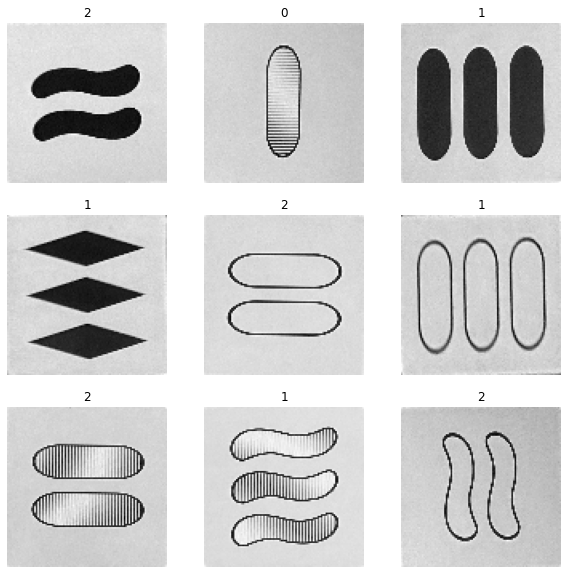

In [345]:
image_size = (100, 100)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'images/number/train',
    seed=42,
    shuffle=True,
    image_size=image_size,
    # color_mode="rgb",  
    color_mode='grayscale',
#     label_mode='categorical',
    batch_size=batch_size,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'images/number/test',
    seed=42,
#     shuffle=True,
    image_size=image_size,
    # color_mode="rgb",  
    color_mode='grayscale',
#     label_mode='categorical',
    batch_size=batch_size,
)
    
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),cmap ="gray")
        plt.title(int(labels[i]))
        plt.axis("off")
        
        
        
# plt.imshow(X_train[2], cmap='gray')    -- for RGB
# plt.imshow((X_train[2] ).astype(np.uint8))


In [346]:
for data, labels in train_ds.take(1):
    X_train = data/255
    
    # Reshape for flat model
    X_train_flat = X_train.reshape((-1,image_size[1]**2)) 
    
    y_train = labels
    y_train_cat = to_categorical(y_train)
    
print(X_train.shape)
print(X_train_flat.shape)
print(y_train.shape)
print(y_train_cat.shape)

for data, labels in test_ds.take(1):
    X_test = data/255
    
    # Reshape for flat model
    X_test_flat = X_train.reshape((-1,image_size[1]**2)) 
    
    y_test = labels
    y_test_cat = to_categorical(y_train)


(32, 100, 100, 1)
(32, 10000)
(32,)
(32, 3)


In [610]:
NN = Sequential()

NN.add(Dense(100,  input_dim = X_train_flat.shape[1])) 
NN.add(Activation('relu'))

NN.add(Dense(30))
NN.add(Activation('relu'))

NN.add(Dense(10, name = '2D_layer')) # note we would typically use higher dim than this for last hidden layer
NN.add(Activation('relu')) # naming this layer so we can extract it later

NN.add(Dense(3))
NN.add(Activation('softmax'))

NN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],)
# NN.fit(X_train, y_train_cat, epochs=20, batch_size=32, verbose=1) # track progress as we fit
# NN.summary()

history = NN.fit(X_train_flat, y_train_cat, 
       validation_split=0.2,
       epochs=500, batch_size=batch_size, verbose=1) # track progress as we fit

Epoch 1/500
1/1 [==============================] - 1s 820ms/step - loss: 1.3705 - accuracy: 0.3600 - val_loss: 1.7311 - val_accuracy: 0.4286
Epoch 2/500
1/1 [==============================] - 0s 23ms/step - loss: 3.8871 - accuracy: 0.2800 - val_loss: 0.7602 - val_accuracy: 0.5714
Epoch 3/500
1/1 [==============================] - 0s 30ms/step - loss: 1.5300 - accuracy: 0.4000 - val_loss: 0.8883 - val_accuracy: 0.5714
Epoch 4/500
1/1 [==============================] - 0s 31ms/step - loss: 1.2647 - accuracy: 0.4000 - val_loss: 1.0802 - val_accuracy: 0.5714
Epoch 5/500
1/1 [==============================] - 0s 31ms/step - loss: 1.1386 - accuracy: 0.4000 - val_loss: 1.5735 - val_accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 30ms/step - loss: 1.2301 - accuracy: 0.3200 - val_loss: 1.5302 - val_accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 29ms/step - loss: 1.2094 - accuracy: 0.3200 - val_loss: 1.2388 - val_accuracy: 0.5714
Epoch 8/500

1/1 [==============================] - 0s 33ms/step - loss: 0.6624 - accuracy: 0.7600 - val_loss: 0.8526 - val_accuracy: 0.5714
Epoch 60/500
1/1 [==============================] - 0s 29ms/step - loss: 0.6549 - accuracy: 0.7600 - val_loss: 0.8363 - val_accuracy: 0.5714
Epoch 61/500
1/1 [==============================] - 0s 26ms/step - loss: 0.6476 - accuracy: 0.7600 - val_loss: 0.8256 - val_accuracy: 0.5714
Epoch 62/500
1/1 [==============================] - 0s 26ms/step - loss: 0.6407 - accuracy: 0.7600 - val_loss: 0.8256 - val_accuracy: 0.5714
Epoch 63/500
1/1 [==============================] - 0s 25ms/step - loss: 0.6335 - accuracy: 0.7600 - val_loss: 0.8310 - val_accuracy: 0.7143
Epoch 64/500
1/1 [==============================] - 0s 24ms/step - loss: 0.6263 - accuracy: 0.7600 - val_loss: 0.8307 - val_accuracy: 0.7143
Epoch 65/500
1/1 [==============================] - 0s 24ms/step - loss: 0.6194 - accuracy: 0.8000 - val_loss: 0.8195 - val_accuracy: 0.7143
Epoch 66/500
1/1 [========

1/1 [==============================] - 0s 48ms/step - loss: 0.3182 - accuracy: 0.8800 - val_loss: 0.5683 - val_accuracy: 0.7143
Epoch 118/500
1/1 [==============================] - 0s 24ms/step - loss: 0.3135 - accuracy: 0.8800 - val_loss: 0.5634 - val_accuracy: 0.7143
Epoch 119/500
1/1 [==============================] - 0s 26ms/step - loss: 0.3089 - accuracy: 0.8800 - val_loss: 0.5580 - val_accuracy: 0.7143
Epoch 120/500
1/1 [==============================] - 0s 24ms/step - loss: 0.3044 - accuracy: 0.8800 - val_loss: 0.5525 - val_accuracy: 0.7143
Epoch 121/500
1/1 [==============================] - 0s 26ms/step - loss: 0.2999 - accuracy: 0.8800 - val_loss: 0.5473 - val_accuracy: 0.7143
Epoch 122/500
1/1 [==============================] - 0s 22ms/step - loss: 0.2955 - accuracy: 0.9200 - val_loss: 0.5432 - val_accuracy: 0.7143
Epoch 123/500
1/1 [==============================] - 0s 28ms/step - loss: 0.2911 - accuracy: 0.9200 - val_loss: 0.5401 - val_accuracy: 0.7143
Epoch 124/500
1/1 [=

Epoch 175/500
1/1 [==============================] - 0s 24ms/step - loss: 0.1185 - accuracy: 1.0000 - val_loss: 0.3487 - val_accuracy: 0.8571
Epoch 176/500
1/1 [==============================] - 0s 29ms/step - loss: 0.1162 - accuracy: 1.0000 - val_loss: 0.3460 - val_accuracy: 0.8571
Epoch 177/500
1/1 [==============================] - 0s 25ms/step - loss: 0.1139 - accuracy: 1.0000 - val_loss: 0.3431 - val_accuracy: 0.8571
Epoch 178/500
1/1 [==============================] - 0s 26ms/step - loss: 0.1117 - accuracy: 1.0000 - val_loss: 0.3401 - val_accuracy: 0.8571
Epoch 179/500
1/1 [==============================] - 0s 28ms/step - loss: 0.1095 - accuracy: 1.0000 - val_loss: 0.3370 - val_accuracy: 0.8571
Epoch 180/500
1/1 [==============================] - 0s 25ms/step - loss: 0.1074 - accuracy: 1.0000 - val_loss: 0.3342 - val_accuracy: 0.8571
Epoch 181/500
1/1 [==============================] - 0s 28ms/step - loss: 0.1053 - accuracy: 1.0000 - val_loss: 0.3316 - val_accuracy: 0.8571
Epoch 

Epoch 233/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 0.2328 - val_accuracy: 1.0000
Epoch 234/500
1/1 [==============================] - 0s 23ms/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.2315 - val_accuracy: 1.0000
Epoch 235/500
1/1 [==============================] - 0s 24ms/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 0.2303 - val_accuracy: 1.0000
Epoch 236/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 0.2292 - val_accuracy: 1.0000
Epoch 237/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0358 - accuracy: 1.0000 - val_loss: 0.2281 - val_accuracy: 1.0000
Epoch 238/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 0.2270 - val_accuracy: 1.0000
Epoch 239/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 0.2260 - val_accuracy: 1.0000
Epoch 

Epoch 291/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.1877 - val_accuracy: 1.0000
Epoch 292/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.1872 - val_accuracy: 1.0000
Epoch 293/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.1867 - val_accuracy: 1.0000
Epoch 294/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.1862 - val_accuracy: 1.0000
Epoch 295/500
1/1 [==============================] - 0s 25ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.1859 - val_accuracy: 1.0000
Epoch 296/500
1/1 [==============================] - 0s 25ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.1854 - val_accuracy: 1.0000
Epoch 297/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.1849 - val_accuracy: 1.0000
Epoch 

Epoch 349/500
1/1 [==============================] - 0s 25ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.1681 - val_accuracy: 0.8571
Epoch 350/500
1/1 [==============================] - 0s 26ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.1680 - val_accuracy: 0.8571
Epoch 351/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.1676 - val_accuracy: 0.8571
Epoch 352/500
1/1 [==============================] - 0s 23ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.1671 - val_accuracy: 0.8571
Epoch 353/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.1668 - val_accuracy: 1.0000
Epoch 354/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.1667 - val_accuracy: 0.8571
Epoch 355/500
1/1 [==============================] - 0s 23ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.1668 - val_accuracy: 0.8571
Epoch 

Epoch 407/500
1/1 [==============================] - 0s 24ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1578 - val_accuracy: 0.8571
Epoch 408/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1577 - val_accuracy: 0.8571
Epoch 409/500
1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1574 - val_accuracy: 0.8571
Epoch 410/500
1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1572 - val_accuracy: 0.8571
Epoch 411/500
1/1 [==============================] - 0s 23ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.1571 - val_accuracy: 0.8571
Epoch 412/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.1572 - val_accuracy: 0.8571
Epoch 413/500
1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.1571 - val_accuracy: 0.8571
Epoch 

Epoch 465/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1519 - val_accuracy: 0.8571
Epoch 466/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1517 - val_accuracy: 0.8571
Epoch 467/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1516 - val_accuracy: 0.8571
Epoch 468/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1515 - val_accuracy: 0.8571
Epoch 469/500
1/1 [==============================] - 0s 21ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1514 - val_accuracy: 0.8571
Epoch 470/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1514 - val_accuracy: 0.8571
Epoch 471/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1513 - val_accuracy: 0.8571
Epoch 

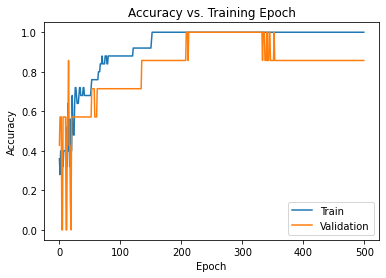

In [611]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy vs. Training Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])

In [612]:
predict_x = NN.predict(X_test_flat) 
classes_x = np.argmax(predict_x,axis=1)[0]

accuracy_score(y_test,classes_x)

TypeError: Singleton array 0 cannot be considered a valid collection.

In [367]:
X_test_flat[1]

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([0.9686337 , 0.9085616 , 0.8873176 , ..., 0.90705085, 0.94964087,
       0.9750448 ], dtype=float32)>

In [379]:
predict_x = NN.predict(X_test_flat) 
classes_x = np.argmax(predict_x, axis=1)


In [380]:
print(classes_x[0])
print(y_test)

0
tf.Tensor([1 2 1 1 0 1 2 2 1 2 1 0 0 0 0 2 2 2 0 2 2 1 0 0 1 1 0 1 1 2 2 2], shape=(32,), dtype=int32)


In [359]:
print(classes_x)
print(int(y_test[0]))

[0 1 0 0 2 2 0 0 0 0 1 1 2 2 0 2 1 2 0 2 1 1 0 1 1 0 2 0 2 0 0 0]
1


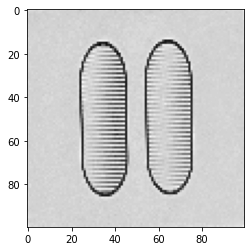

In [354]:
plt.imshow(X_test[1], cmap ="gray")

predict_x = NN.predict(X_test_flat[1]) 
classes_x = np.argmax(predict_x)

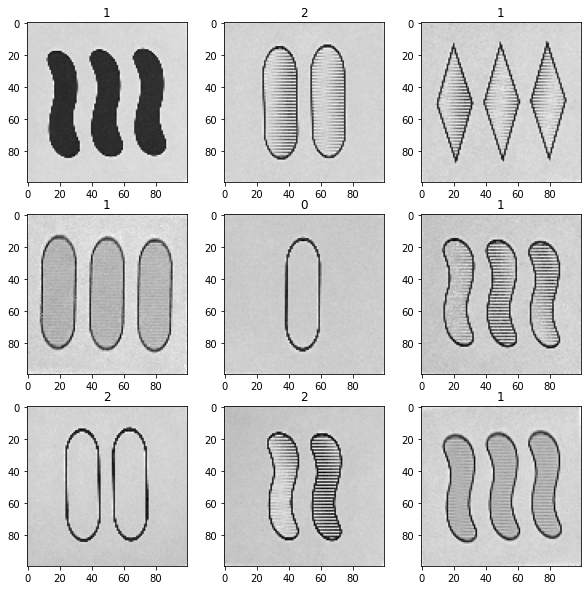

In [360]:
# plt.figure(figsize=(10, 10))
# for images, labels in test_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"),cmap ="gray")
#         plt.title(int(labels[i]))
#         plt.axis("off")
        
plt.figure(figsize=(10, 10))     
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i], cmap ="gray")
    plt.title(int(y_test[i]))
#     plt.axis("off")
        

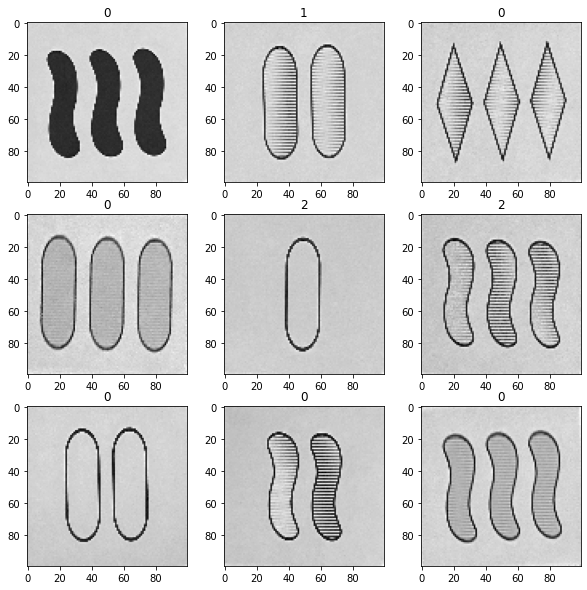

In [381]:
predict_x = NN.predict(X_test_flat) 
classes_x = np.argmax(predict_x, axis=1)

plt.figure(figsize=(10, 10))     
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i], cmap ="gray")
    plt.title(classes_x[i])
    


## Flat Model with data augmentation

In [286]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('testcard0.png')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0

for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely
        
        

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")        
        


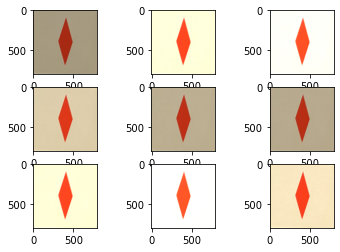

In [328]:
img = load_img('testcard8.png')
data = img_to_array(img)
samples = np.expand_dims(data, 0)

datagen = ImageDataGenerator(
#     rotation_range=360,
    brightness_range=(0.67, 1.5),
#     zoom_range=[.7, .9],
#     horizontal_flip = True,
#     width_shift_range=[-200,200],
)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
# show the figure
plt.show()

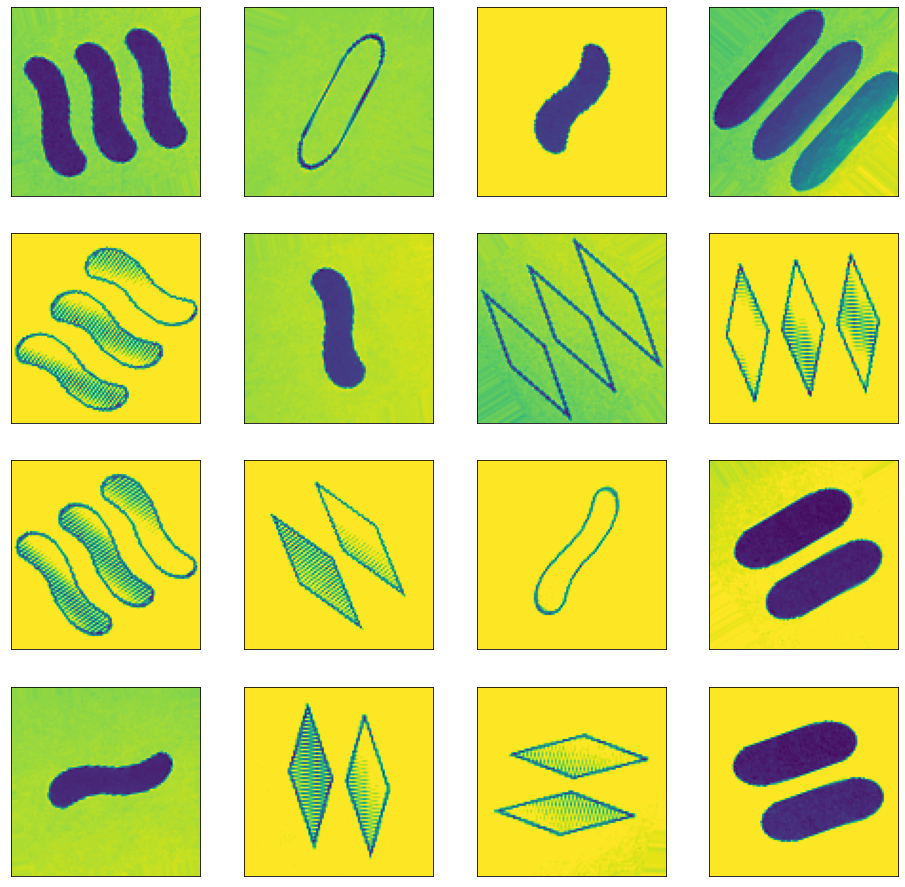

In [310]:
data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0)
data_generator.fit(images)
image_iterator = data_generator.flow(images)

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_iterator.next()[0].astype('int'))
plt.show()

## Augmentation that didn't work

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255, 
        validation_split=0.2,
        #other augmentation,
       )

train_dataset = train_datagen.flow_from_directory(
                                                 directory='images/shape/train',
                                                 shuffle=True, seed=42,
                                                 color_mode=color_mode,
                                                 target_size=image_size,
                                                 batch_size=batch_size,
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = train_datagen.flow_from_directory(
                                                 directory='images/shape/train',
                                                 shuffle=True, seed=42,
                                                 color_mode=color_mode,
                                                 target_size=image_size,
                                                 batch_size=batch_size,
                                                 subset="validation",
                                                 class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'images/number/test',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')


model.fit(
        train_dataset,
        epochs=50,
        validation_data=validation_dataset,
        )


## CNN Model for Number
(first without augmentation, then with) 

In [599]:
image_size = (100, 100)
batch_size = 32
color_mode='grayscale'

Found 1680 files belonging to 3 classes.
Found 105 files belonging to 3 classes.


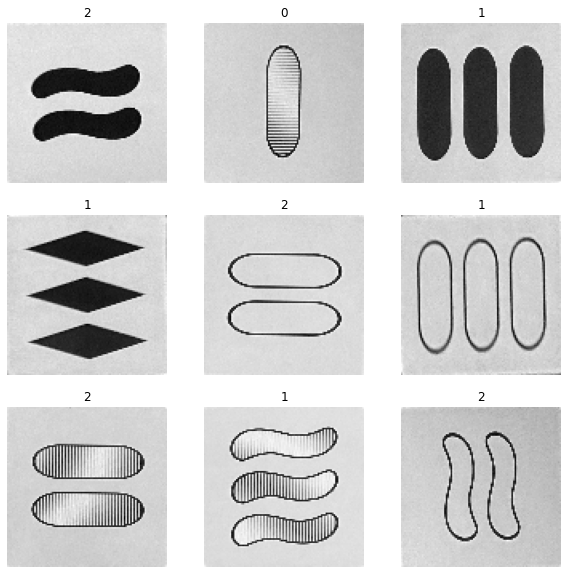

In [600]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'images/number/train',
    seed=42,
    shuffle=True,
    image_size=image_size,
    # color_mode="rgb",  
    color_mode='grayscale',
#     label_mode='categorical',
    batch_size=batch_size,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'images/number/test',
    seed=42,
#     shuffle=True,
    image_size=image_size,
    # color_mode="rgb",  
    color_mode='grayscale',
#     label_mode='categorical',
    batch_size=batch_size,
)
    
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),cmap ="gray")
        plt.title(int(labels[i]))
        plt.axis("off")
        
        
        
# plt.imshow(X_train[2], cmap='gray')    -- for RGB
# plt.imshow((X_train[2] ).astype(np.uint8))


In [613]:
for data, labels in train_ds.take(1):
    X_train = data/255
    
    # Reshape for flat model
    X_train_flat = X_train.reshape((-1,image_size[1]**2)) 
    
    y_train = labels
    y_train_cat = to_categorical(y_train)
    
print(X_train.shape)
print(X_train_flat.shape)
print(y_train.shape)
print(y_train_cat.shape)

for data, labels in test_ds.take(1):
    X_test = data/255
    
    # Reshape for flat model
    X_test_flat = X_train.reshape((-1,image_size[1]**2)) 
    
    y_test = labels
    y_test_cat = to_categorical(y_train)


(32, 100, 100, 1)
(32, 10000)
(32,)
(32, 3)


In [614]:
NN_scratch = Sequential(
                        [InputLayer(input_shape=X_train.shape[1:]),
                         Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Conv2D(filters=48, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Flatten(),
                         Dense(10, activation='relu'),
                         Dense(3, activation='softmax')]
                       )

NN_scratch.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

NN_scratch.summary()

Model: "sequential_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_196 (Conv2D)          (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_188 (MaxPoolin (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_197 (Conv2D)          (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_189 (MaxPoolin (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 25, 25, 48)        13872     
_________________________________________________________________
max_pooling2d_190 (MaxPoolin (None, 12, 12, 48)        0         
_________________________________________________________________
flatten_60 (Flatten)         (None, 6912)           

In [615]:
history = NN_scratch.fit(X_train, y_train_cat, epochs=100, verbose=1, validation_split=0.25)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.0983 - accuracy: 0.2917 - val_loss: 1.1107 - val_accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 117ms/step - loss: 1.0912 - accuracy: 0.2917 - val_loss: 1.0782 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 105ms/step - loss: 1.0779 - accuracy: 0.5000 - val_loss: 1.0686 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 96ms/step - loss: 1.0653 - accuracy: 0.5000 - val_loss: 1.1000 - val_accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 92ms/step - loss: 1.0784 - accuracy: 0.2917 - val_loss: 1.0583 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 94ms/step - loss: 1.0425 - accuracy: 0.5000 - val_loss: 1.0611 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 100ms/step - loss: 1.0355 - accuracy: 0.6250 - val_loss: 1.0373 - val_accuracy: 0.5000
Epoch 8/100
1/1 [==

Epoch 59/100
1/1 [==============================] - 0s 95ms/step - loss: 0.2977 - accuracy: 0.8750 - val_loss: 0.4102 - val_accuracy: 1.0000
Epoch 60/100
1/1 [==============================] - 0s 104ms/step - loss: 0.2847 - accuracy: 0.9583 - val_loss: 0.3880 - val_accuracy: 1.0000
Epoch 61/100
1/1 [==============================] - 0s 114ms/step - loss: 0.2709 - accuracy: 0.9583 - val_loss: 0.3222 - val_accuracy: 1.0000
Epoch 62/100
1/1 [==============================] - 0s 98ms/step - loss: 0.2618 - accuracy: 0.8750 - val_loss: 0.3253 - val_accuracy: 1.0000
Epoch 63/100
1/1 [==============================] - 0s 105ms/step - loss: 0.2453 - accuracy: 0.9583 - val_loss: 0.3644 - val_accuracy: 1.0000
Epoch 64/100
1/1 [==============================] - 0s 108ms/step - loss: 0.2386 - accuracy: 0.9583 - val_loss: 0.3107 - val_accuracy: 1.0000
Epoch 65/100
1/1 [==============================] - 0s 106ms/step - loss: 0.2218 - accuracy: 0.9583 - val_loss: 0.2697 - val_accuracy: 1.0000
Epoch 66

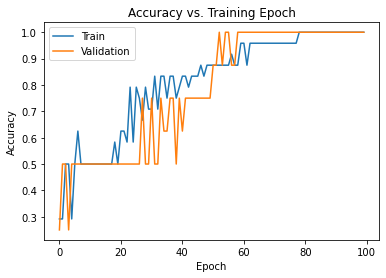

In [616]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy vs. Training Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])

1.0

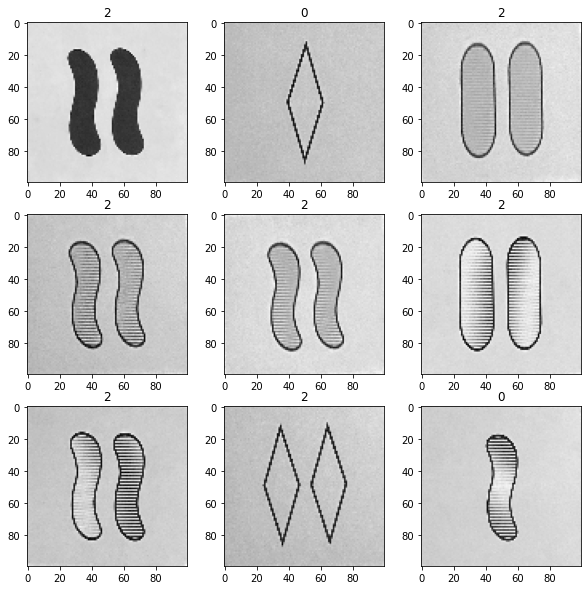

In [617]:
predict_x = NN_scratch.predict(X_test) 
classes_x = np.argmax(predict_x, axis=1)

plt.figure(figsize=(10, 10))     
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i+9], cmap ="gray")
    plt.title(classes_x[i+9])
    
accuracy_score(y_test,classes_x)

## CNN Model for Shape


Found 1680 files belonging to 3 classes.
Found 105 files belonging to 3 classes.
(48, 100, 100, 1)
(48, 10000)
(48,)
(48, 3)


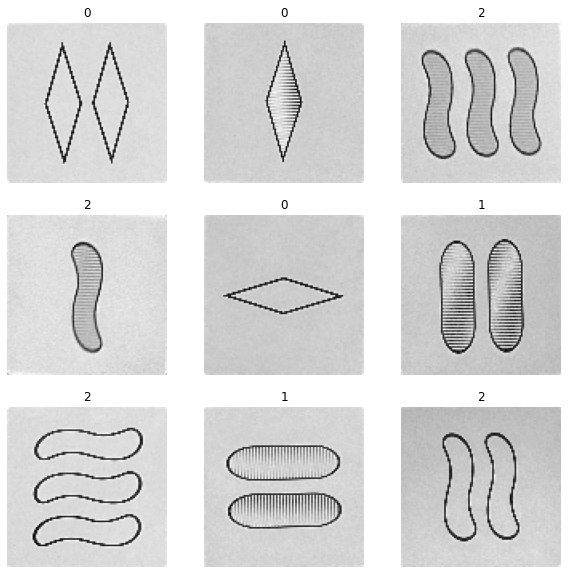

In [523]:
image_size = (100, 100)
batch_size = 48
color_mode='grayscale'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'images/shape/train',
    seed=42,
    shuffle=True,
    image_size=image_size,
    # color_mode="rgb",  
    color_mode='grayscale',
#     label_mode='categorical',
    batch_size=batch_size,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'images/shape/test',
    seed=42,
#     shuffle=True,
    image_size=image_size,
    # color_mode="rgb",  
    color_mode='grayscale',
#     label_mode='categorical',
    batch_size=batch_size,
)
    
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),cmap ="gray")
        plt.title(int(labels[i]))
        plt.axis("off")
        
        
        
# plt.imshow(X_train[2], cmap='gray')    -- for RGB
# plt.imshow((X_train[2] ).astype(np.uint8))

for data, labels in train_ds.take(1):
    X_train = data/255
    
    # Reshape for flat model
    X_train_flat = X_train.reshape((-1,image_size[1]**2)) 
    
    y_train = labels
    y_train_cat = to_categorical(y_train)
    
print(X_train.shape)
print(X_train_flat.shape)
print(y_train.shape)
print(y_train_cat.shape)

for data, labels in test_ds.take(1):
    X_test = data/255
    
    # Reshape for flat model
    X_test_flat = X_train.reshape((-1,image_size[1]**2)) 
    
    y_test = labels
    y_test_cat = to_categorical(y_train)


In [531]:
NN_shape = Sequential(
                        [InputLayer(input_shape=X_train.shape[1:]),
                         Conv2D(filters=96, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Conv2D(filters=48, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Flatten(),
                         Dense(9, activation='relu'),
                         Dense(3, activation='softmax')]
                       )

NN_shape.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

NN_shape.summary()

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_151 (Conv2D)          (None, 100, 100, 96)      960       
_________________________________________________________________
max_pooling2d_143 (MaxPoolin (None, 50, 50, 96)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 50, 50, 32)        27680     
_________________________________________________________________
max_pooling2d_144 (MaxPoolin (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 25, 25, 48)        13872     
_________________________________________________________________
max_pooling2d_145 (MaxPoolin (None, 12, 12, 48)        0         
_________________________________________________________________
flatten_45 (Flatten)         (None, 6912)           

In [532]:
history_shape = NN_shape.fit(X_train, y_train_cat, epochs=300, verbose=1, validation_split=0.25)

Epoch 1/300
2/2 [==============================] - 1s 253ms/step - loss: 1.0611 - accuracy: 0.5556 - val_loss: 1.5739 - val_accuracy: 0.3333
Epoch 2/300
2/2 [==============================] - 0s 128ms/step - loss: 1.0698 - accuracy: 0.5556 - val_loss: 1.1953 - val_accuracy: 0.3333
Epoch 3/300
2/2 [==============================] - 0s 161ms/step - loss: 1.0342 - accuracy: 0.5556 - val_loss: 1.1700 - val_accuracy: 0.3333
Epoch 4/300
2/2 [==============================] - 0s 125ms/step - loss: 1.0038 - accuracy: 0.5556 - val_loss: 1.3950 - val_accuracy: 0.3333
Epoch 5/300
2/2 [==============================] - 0s 127ms/step - loss: 1.0181 - accuracy: 0.5556 - val_loss: 1.6500 - val_accuracy: 0.3333
Epoch 6/300
2/2 [==============================] - 0s 125ms/step - loss: 1.1145 - accuracy: 0.5556 - val_loss: 1.5046 - val_accuracy: 0.3333
Epoch 7/300
2/2 [==============================] - 0s 124ms/step - loss: 1.0517 - accuracy: 0.5556 - val_loss: 1.2847 - val_accuracy: 0.3333
Epoch 8/300
2

Epoch 59/300
2/2 [==============================] - 0s 133ms/step - loss: 0.4495 - accuracy: 0.8056 - val_loss: 0.9875 - val_accuracy: 0.5000
Epoch 60/300
2/2 [==============================] - 0s 129ms/step - loss: 0.4366 - accuracy: 0.8333 - val_loss: 0.9567 - val_accuracy: 0.5833
Epoch 61/300
2/2 [==============================] - 0s 125ms/step - loss: 0.4246 - accuracy: 0.8889 - val_loss: 0.9337 - val_accuracy: 0.6667
Epoch 62/300
2/2 [==============================] - 0s 131ms/step - loss: 0.4164 - accuracy: 0.9167 - val_loss: 0.9177 - val_accuracy: 0.6667
Epoch 63/300
2/2 [==============================] - 0s 135ms/step - loss: 0.4041 - accuracy: 0.9167 - val_loss: 0.9240 - val_accuracy: 0.6667
Epoch 64/300
2/2 [==============================] - 0s 125ms/step - loss: 0.3931 - accuracy: 0.9444 - val_loss: 0.9364 - val_accuracy: 0.6667
Epoch 65/300
2/2 [==============================] - 0s 128ms/step - loss: 0.3868 - accuracy: 0.9444 - val_loss: 0.8906 - val_accuracy: 0.5833
Epoch 

2/2 [==============================] - 0s 129ms/step - loss: 0.3232 - accuracy: 0.9722 - val_loss: 0.5377 - val_accuracy: 0.9167
Epoch 117/300
2/2 [==============================] - 0s 127ms/step - loss: 0.3153 - accuracy: 0.9722 - val_loss: 0.6073 - val_accuracy: 0.7500
Epoch 118/300
2/2 [==============================] - 0s 133ms/step - loss: 0.2709 - accuracy: 0.9722 - val_loss: 0.9540 - val_accuracy: 0.5833
Epoch 119/300
2/2 [==============================] - 0s 134ms/step - loss: 0.3036 - accuracy: 0.7778 - val_loss: 1.0087 - val_accuracy: 0.5833
Epoch 120/300
2/2 [==============================] - 0s 128ms/step - loss: 0.2509 - accuracy: 0.9722 - val_loss: 1.7820 - val_accuracy: 0.6667
Epoch 121/300
2/2 [==============================] - 0s 131ms/step - loss: 0.3784 - accuracy: 0.8889 - val_loss: 0.9433 - val_accuracy: 0.7500
Epoch 122/300
2/2 [==============================] - 0s 126ms/step - loss: 0.2529 - accuracy: 1.0000 - val_loss: 0.8040 - val_accuracy: 0.6667
Epoch 123/300

2/2 [==============================] - 0s 126ms/step - loss: 0.2024 - accuracy: 1.0000 - val_loss: 1.4478 - val_accuracy: 0.6667
Epoch 174/300
2/2 [==============================] - 0s 129ms/step - loss: 0.2018 - accuracy: 1.0000 - val_loss: 1.4983 - val_accuracy: 0.6667
Epoch 175/300
2/2 [==============================] - 0s 124ms/step - loss: 0.2017 - accuracy: 1.0000 - val_loss: 1.2263 - val_accuracy: 0.6667
Epoch 176/300
2/2 [==============================] - 0s 127ms/step - loss: 0.2045 - accuracy: 1.0000 - val_loss: 0.8678 - val_accuracy: 0.6667
Epoch 177/300
2/2 [==============================] - 0s 130ms/step - loss: 0.2068 - accuracy: 1.0000 - val_loss: 0.6827 - val_accuracy: 0.5833
Epoch 178/300
2/2 [==============================] - 0s 126ms/step - loss: 0.2121 - accuracy: 1.0000 - val_loss: 0.5780 - val_accuracy: 0.6667
Epoch 179/300
2/2 [==============================] - 0s 126ms/step - loss: 0.2177 - accuracy: 1.0000 - val_loss: 0.5429 - val_accuracy: 0.6667
Epoch 180/300

2/2 [==============================] - 0s 134ms/step - loss: 0.1784 - accuracy: 1.0000 - val_loss: 1.7503 - val_accuracy: 0.7500
Epoch 231/300
2/2 [==============================] - 0s 132ms/step - loss: 0.1780 - accuracy: 1.0000 - val_loss: 1.7645 - val_accuracy: 0.7500
Epoch 232/300
2/2 [==============================] - 0s 131ms/step - loss: 0.1776 - accuracy: 1.0000 - val_loss: 1.7793 - val_accuracy: 0.7500
Epoch 233/300
2/2 [==============================] - 0s 134ms/step - loss: 0.1772 - accuracy: 1.0000 - val_loss: 1.7944 - val_accuracy: 0.7500
Epoch 234/300
2/2 [==============================] - 0s 130ms/step - loss: 0.1768 - accuracy: 1.0000 - val_loss: 1.8096 - val_accuracy: 0.7500
Epoch 235/300
2/2 [==============================] - 0s 128ms/step - loss: 0.1764 - accuracy: 1.0000 - val_loss: 1.8252 - val_accuracy: 0.7500
Epoch 236/300
2/2 [==============================] - 0s 127ms/step - loss: 0.1759 - accuracy: 1.0000 - val_loss: 1.8409 - val_accuracy: 0.7500
Epoch 237/300

2/2 [==============================] - 0s 124ms/step - loss: 0.1729 - accuracy: 1.0000 - val_loss: 0.4735 - val_accuracy: 0.8333
Epoch 288/300
2/2 [==============================] - 0s 121ms/step - loss: 0.1688 - accuracy: 1.0000 - val_loss: 0.6493 - val_accuracy: 0.7500
Epoch 289/300
2/2 [==============================] - 0s 119ms/step - loss: 0.1640 - accuracy: 1.0000 - val_loss: 0.9151 - val_accuracy: 0.7500
Epoch 290/300
2/2 [==============================] - 0s 123ms/step - loss: 0.1644 - accuracy: 1.0000 - val_loss: 0.8521 - val_accuracy: 0.7500
Epoch 291/300
2/2 [==============================] - 0s 126ms/step - loss: 0.1734 - accuracy: 1.0000 - val_loss: 0.5914 - val_accuracy: 0.7500
Epoch 292/300
2/2 [==============================] - 0s 124ms/step - loss: 0.2432 - accuracy: 1.0000 - val_loss: 0.4083 - val_accuracy: 0.9167
Epoch 293/300
2/2 [==============================] - 0s 124ms/step - loss: 0.1962 - accuracy: 0.9722 - val_loss: 0.4125 - val_accuracy: 0.9167
Epoch 294/300

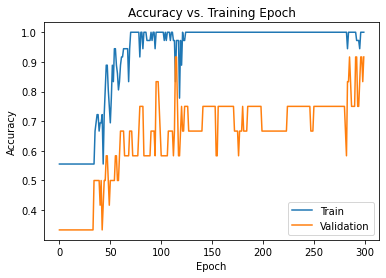

In [533]:
plt.plot(history_shape.history['accuracy'])
plt.plot(history_shape.history['val_accuracy'])

plt.title('Accuracy vs. Training Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])

0.5833333333333334

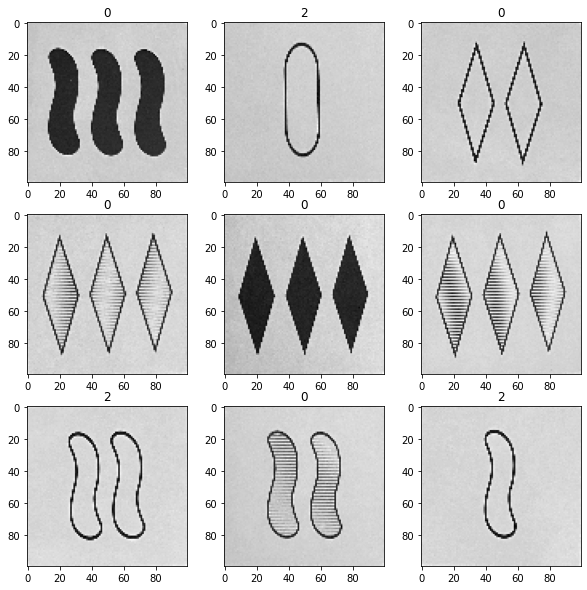

In [534]:
predict_x = NN_shape.predict(X_test) 
classes_x = np.argmax(predict_x, axis=1)

plt.figure(figsize=(10, 10))     
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i+9], cmap ="gray")
    plt.title(classes_x[i+9])
    
accuracy_score(y_test,classes_x)

## CNN Model for Shading


Found 1680 files belonging to 3 classes.
Found 105 files belonging to 3 classes.
(32, 100, 100, 1)
(32, 10000)
(32,)
(32, 3)


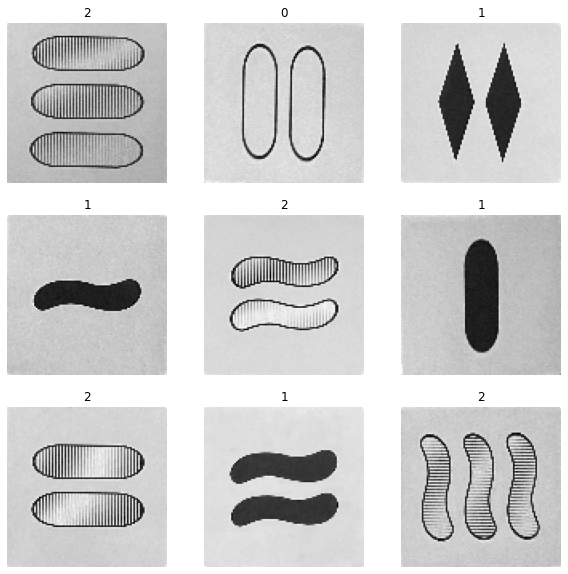

In [535]:
image_size = (100, 100)
batch_size = 32
color_mode='grayscale'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'images/shading/train',
    seed=42,
    shuffle=True,
    image_size=image_size,
    # color_mode="rgb",  
    color_mode='grayscale',
#     label_mode='categorical',
    batch_size=batch_size,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'images/shading/test',
    seed=42,
#     shuffle=True,
    image_size=image_size,
    # color_mode="rgb",  
    color_mode='grayscale',
#     label_mode='categorical',
    batch_size=batch_size,
)
    
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),cmap ="gray")
        plt.title(int(labels[i]))
        plt.axis("off")
        
        
        
# plt.imshow(X_train[2], cmap='gray')    -- for RGB
# plt.imshow((X_train[2] ).astype(np.uint8))

for data, labels in train_ds.take(1):
    X_train = data/255
    
    # Reshape for flat model
    X_train_flat = X_train.reshape((-1,image_size[1]**2)) 
    
    y_train = labels
    y_train_cat = to_categorical(y_train)
    
print(X_train.shape)
print(X_train_flat.shape)
print(y_train.shape)
print(y_train_cat.shape)

for data, labels in test_ds.take(1):
    X_test = data/255
    
    # Reshape for flat model
    X_test_flat = X_train.reshape((-1,image_size[1]**2)) 
    
    y_test = labels
    y_test_cat = to_categorical(y_train)


In [536]:
NN_shading = Sequential(
                        [InputLayer(input_shape=X_train.shape[1:]),
                         Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Conv2D(filters=48, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Flatten(),
                         Dense(10, activation='relu'),
                         Dense(3, activation='softmax')]
                       )

NN_shading.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

NN_shading.summary()

Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_154 (Conv2D)          (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_146 (MaxPoolin (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_147 (MaxPoolin (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 25, 25, 48)        13872     
_________________________________________________________________
max_pooling2d_148 (MaxPoolin (None, 12, 12, 48)        0         
_________________________________________________________________
flatten_46 (Flatten)         (None, 6912)           

In [538]:
history_shading = NN_shading.fit(X_train, y_train_cat, epochs=100, verbose=1, validation_split=0.25)

Epoch 1/100
1/1 [==============================] - 0s 112ms/step - loss: 0.3957 - accuracy: 1.0000 - val_loss: 2.1426 - val_accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 87ms/step - loss: 0.3881 - accuracy: 1.0000 - val_loss: 2.3893 - val_accuracy: 0.3750
Epoch 3/100
1/1 [==============================] - 0s 98ms/step - loss: 0.3852 - accuracy: 0.9583 - val_loss: 2.1581 - val_accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 92ms/step - loss: 0.3756 - accuracy: 1.0000 - val_loss: 2.0673 - val_accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 91ms/step - loss: 0.3822 - accuracy: 0.9167 - val_loss: 2.0292 - val_accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 94ms/step - loss: 0.3770 - accuracy: 0.9167 - val_loss: 2.0906 - val_accuracy: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 96ms/step - loss: 0.3645 - accuracy: 1.0000 - val_loss: 2.2290 - val_accuracy: 0.3750
Epoch 8/100
1/1 [==

1/1 [==============================] - 0s 94ms/step - loss: 0.3013 - accuracy: 1.0000 - val_loss: 1.9722 - val_accuracy: 0.2500
Epoch 60/100
1/1 [==============================] - 0s 88ms/step - loss: 0.3032 - accuracy: 1.0000 - val_loss: 1.9363 - val_accuracy: 0.2500
Epoch 61/100
1/1 [==============================] - 0s 87ms/step - loss: 0.3047 - accuracy: 1.0000 - val_loss: 1.9903 - val_accuracy: 0.2500
Epoch 62/100
1/1 [==============================] - 0s 93ms/step - loss: 0.3038 - accuracy: 1.0000 - val_loss: 2.1217 - val_accuracy: 0.2500
Epoch 63/100
1/1 [==============================] - 0s 91ms/step - loss: 0.3039 - accuracy: 1.0000 - val_loss: 2.2301 - val_accuracy: 0.2500
Epoch 64/100
1/1 [==============================] - 0s 92ms/step - loss: 0.2997 - accuracy: 0.9583 - val_loss: 2.3078 - val_accuracy: 0.2500
Epoch 65/100
1/1 [==============================] - 0s 101ms/step - loss: 0.2893 - accuracy: 1.0000 - val_loss: 2.3993 - val_accuracy: 0.2500
Epoch 66/100
1/1 [=======

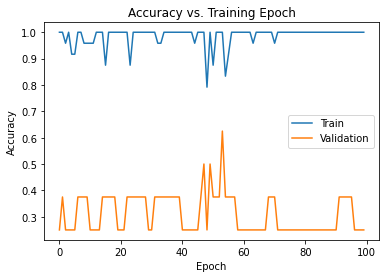

In [540]:
plt.plot(history_shading.history['accuracy'])
plt.plot(history_shading.history['val_accuracy'])

plt.title('Accuracy vs. Training Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])

0.5

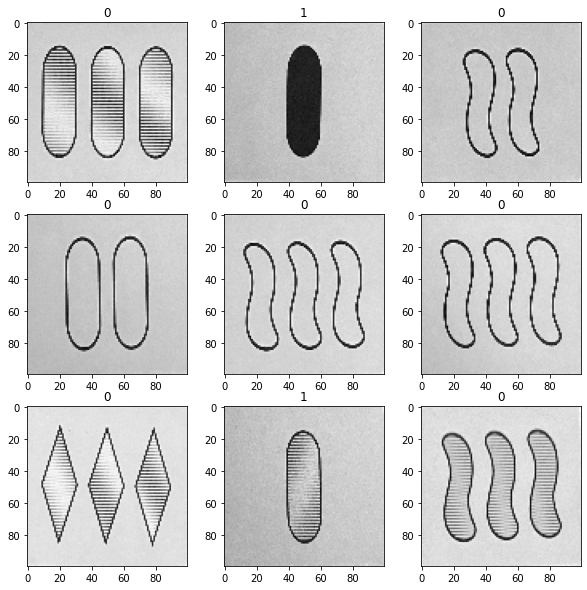

In [541]:
predict_x = NN_shading.predict(X_test) 
classes_x = np.argmax(predict_x, axis=1)

plt.figure(figsize=(10, 10))     
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i+9], cmap ="gray")
    plt.title(classes_x[i+9])
    
accuracy_score(y_test,classes_x)

## CNN Model for Color - RGB


Found 1680 files belonging to 3 classes.
Found 105 files belonging to 3 classes.
(32, 150, 150, 3)
(96, 22500)
(32,)
(32, 3)


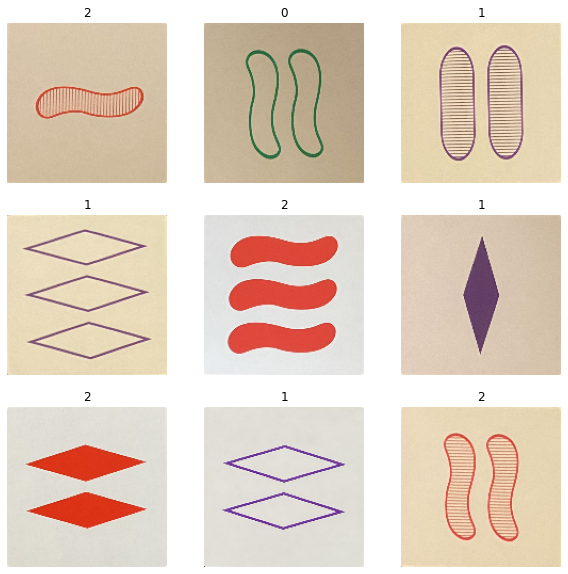

In [580]:
image_size = (150, 150)
batch_size = 32
color_mode='rgb'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'images/color/train',
    seed=42,
    shuffle=True,
    image_size=image_size,
    # color_mode="rgb",  
    color_mode='rgb',
#     label_mode='categorical',
    batch_size=batch_size,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'images/color/test',
    seed=42,
#     shuffle=True,
    image_size=image_size,
    # color_mode="rgb",  
    color_mode='rgb',
#     label_mode='categorical',
    batch_size=batch_size,
)
    
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),cmap ="gray")
        plt.title(int(labels[i]))
        plt.axis("off")
        
        
        
# plt.imshow(X_train[2], cmap='gray')    -- for RGB
# plt.imshow((X_train[2] ).astype(np.uint8))

for data, labels in train_ds.take(1):
    X_train = data/255
    
    # Reshape for flat model
    X_train_flat = X_train.reshape((-1,image_size[1]**2)) 
    
    y_train = labels
    y_train_cat = to_categorical(y_train)
    
print(X_train.shape)
print(X_train_flat.shape)
print(y_train.shape)
print(y_train_cat.shape)

for data, labels in test_ds.take(1):
    X_test = data/255
    
    # Reshape for flat model
    X_test_flat = X_train.reshape((-1,image_size[1]**2)) 
    
    y_test = labels
    y_test_cat = to_categorical(y_train)


In [585]:
NN_color = Sequential(
                        [InputLayer(input_shape=X_train.shape[1:]),
                         Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Flatten(),
                         Dense(6, activation='relu'),
                         Dense(3, activation='softmax')]
                       )

NN_color.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

NN_color.summary()

Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_187 (Conv2D)          (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_179 (MaxPoolin (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_180 (MaxPoolin (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_181 (MaxPoolin (None, 18, 18, 32)        0         
_________________________________________________________________
flatten_57 (Flatten)         (None, 10368)          

In [586]:
history_color = NN_color.fit(X_train, y_train_cat, epochs=100, verbose=1, validation_split=0.25)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.1025 - accuracy: 0.2917 - val_loss: 1.0568 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 222ms/step - loss: 1.0917 - accuracy: 0.4167 - val_loss: 1.0551 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 221ms/step - loss: 1.0726 - accuracy: 0.4167 - val_loss: 1.0654 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 219ms/step - loss: 1.0699 - accuracy: 0.4167 - val_loss: 1.0516 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 212ms/step - loss: 1.0526 - accuracy: 0.4167 - val_loss: 1.0395 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 211ms/step - loss: 1.0421 - accuracy: 0.4167 - val_loss: 1.0306 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 218ms/step - loss: 1.0274 - accuracy: 0.4167 - val_loss: 1.0248 - val_accuracy: 0.5000
Epoch 8/100
1/1 

Epoch 59/100
1/1 [==============================] - 0s 234ms/step - loss: 0.6232 - accuracy: 0.7083 - val_loss: 0.5483 - val_accuracy: 0.8750
Epoch 60/100
1/1 [==============================] - 0s 239ms/step - loss: 0.6227 - accuracy: 0.7083 - val_loss: 0.5467 - val_accuracy: 0.8750
Epoch 61/100
1/1 [==============================] - 0s 216ms/step - loss: 0.6222 - accuracy: 0.7083 - val_loss: 0.5450 - val_accuracy: 0.8750
Epoch 62/100
1/1 [==============================] - 0s 216ms/step - loss: 0.6217 - accuracy: 0.7083 - val_loss: 0.5433 - val_accuracy: 0.8750
Epoch 63/100
1/1 [==============================] - 0s 220ms/step - loss: 0.6212 - accuracy: 0.7083 - val_loss: 0.5415 - val_accuracy: 0.8750
Epoch 64/100
1/1 [==============================] - 0s 212ms/step - loss: 0.6207 - accuracy: 0.7083 - val_loss: 0.5399 - val_accuracy: 0.8750
Epoch 65/100
1/1 [==============================] - 0s 213ms/step - loss: 0.6202 - accuracy: 0.7083 - val_loss: 0.5383 - val_accuracy: 0.8750
Epoch 

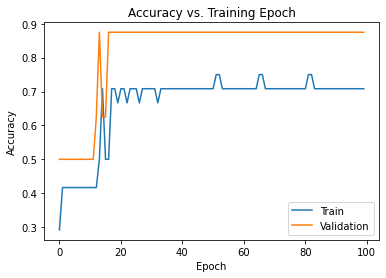

In [587]:
plt.plot(history_color.history['accuracy'])
plt.plot(history_color.history['val_accuracy'])

plt.title('Accuracy vs. Training Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])

0.65625

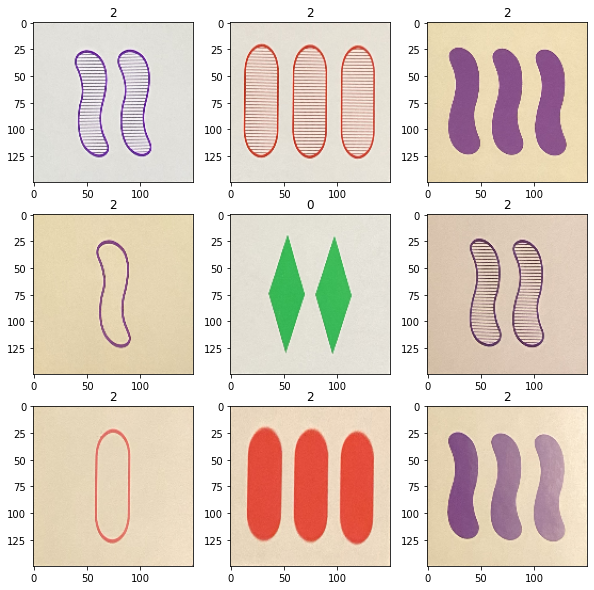

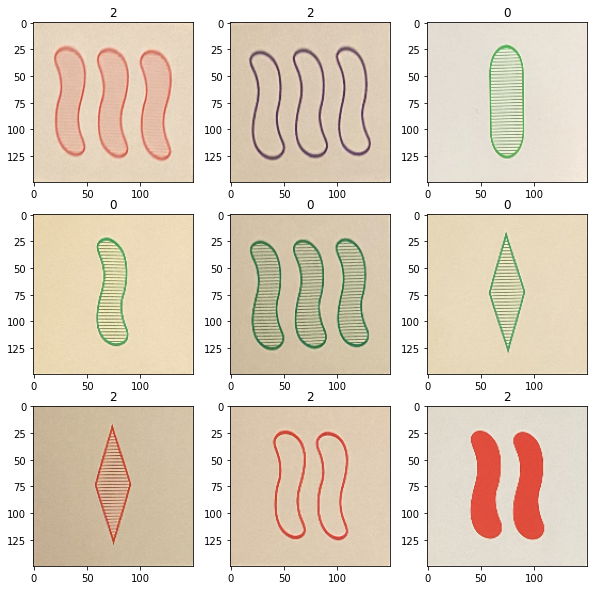

In [588]:
predict_x = NN_color.predict(X_test) 
classes_x = np.argmax(predict_x, axis=1)

plt.figure(figsize=(10, 10))     
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i], cmap ="gray")
    plt.title(classes_x[i])

plt.figure(figsize=(10, 10))     
for i in range(9):
    ax = plt.s ubplot(3, 3, i + 1)
    plt.imshow(X_test[i+9], cmap ="gray")
    plt.title(classes_x[i+9])
    
accuracy_score(y_test,classes_x)

## Try a flat NN Color model

In [592]:
for data, labels in train_ds.take(1):
    X_train = data/255
    
    # Reshape for flat model
    X_train_flat = X_train.reshape((-1,image_size[1]**2,3)) 
    
    y_train = labels
    y_train_cat = to_categorical(y_train)
    
print(X_train.shape)
print(X_train_flat.shape)
print(y_train.shape)
print(y_train_cat.shape)

for data, labels in test_ds.take(1):
    X_test = data/255
    
    # Reshape for flat model
    X_test_flat = X_train.reshape((-1,image_size[1]**2,3)) 
    
    y_test = labels
    y_test_cat = to_categorical(y_train)


(32, 150, 150, 3)
(32, 22500, 3)
(32,)
(32, 3)


In [598]:
NN = Sequential()

NN.add(Dense(30,  input_dim = X_train_flat.shape[1:])) 
NN.add(Activation('relu'))

NN.add(Dense(20))
NN.add(Activation('relu'))

NN.add(Dense(10, name = '2D_layer')) # note we would typically use higher dim than this for last hidden layer
NN.add(Activation('relu')) # naming this layer so we can extract it later

NN.add(Dense(3))
NN.add(Activation('softmax'))

NN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],)
# NN.fit(X_train, y_train_cat, epochs=20, batch_size=32, verbose=1) # track progress as we fit
NN.summary()

TypeError: Dimension value must be integer or None or have an __index__ method, got value 'TensorShape([22500, 3])' with type '<class 'tensorflow.python.framework.tensor_shape.TensorShape'>'

In [597]:
history = NN.fit(X_train_flat, y_train_cat, 
       validation_split=0.2,
       epochs=500, batch_size=batch_size, verbose=1) # track progress as we fit

Epoch 1/500


ValueError: in user code:

    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_126 is incompatible with the layer: expected axis -1 of input shape to have value 22500 but received input with shape (None, 22500, 3)
